In [6]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#importing models
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import SVC,LinearSVC

warnings.filterwarnings('ignore') #ignore warning messages 

In [7]:
data = pd.read_csv('data (2).csv')

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [11]:
#splitting train and test data

X=data.drop(['diagnosis'], axis=1)
y=data['diagnosis']


In [12]:
# Normalization
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [13]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [14]:
y_train.value_counts()

diagnosis
0    286
1    169
Name: count, dtype: int64

In [15]:
mod = []
accuracy=[]
model =[LogisticRegression(), RandomForestClassifier(), SVC(), AdaBoostClassifier(), BaggingClassifier(), 
GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]

In [16]:
for m in model:
    accuracy.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
    
model_df=pd.DataFrame(columns=['model','accuracy'])
model_df['model']=mod
model_df['accuracy']=accuracy
model_df.sort_values(by=['accuracy'], ascending=True).style.background_gradient(subset=['accuracy'])

,model,accuracy
2,SVC(),0.903297
7,ExtraTreeClassifier(),0.905495
6,DecisionTreeClassifier(),0.923077
0,LogisticRegression(),0.938462
4,BaggingClassifier(),0.945055
5,GradientBoostingClassifier(),0.951648
1,RandomForestClassifier(),0.962637
3,AdaBoostClassifier(),0.964835
8,KNeighborsClassifier(),nan


In [17]:
#logistic regression

# Find best hyperparameters (accuracy)
lr = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_lr = GridSearchCV(estimator = lr, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_lr.fit(X_train, y_train)

best_parameters = CV_lr.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 10, 'penalty': 'l2'}


In [18]:
#Log with best hyperparameters

lgr = LogisticRegression(C = 0.1, penalty = 'l2', random_state=random_state)
lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy on training set: 0.943
Accuracy on test set: 0.965


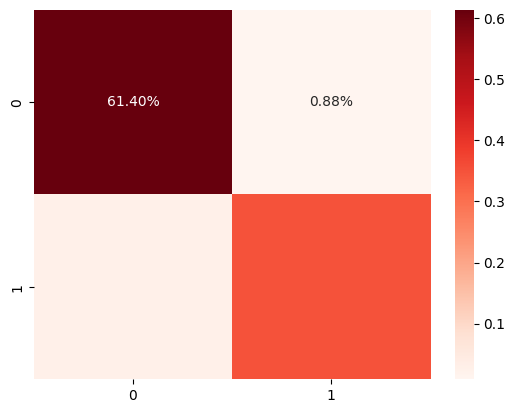

In [19]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test, pred))

print("Accuracy on training set: {:.3f}".format(lgr.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(lgr.score(X_test,y_test)))

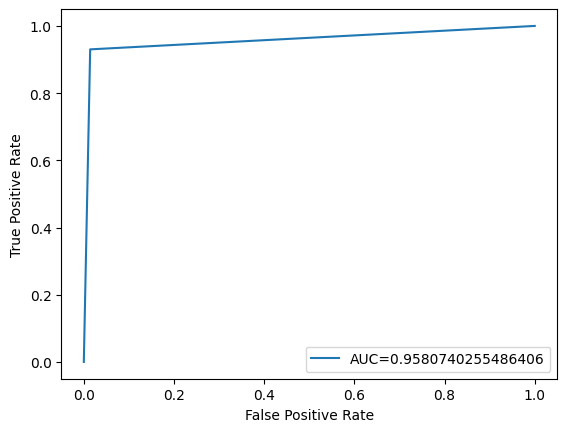

In [20]:
#define metrics

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [21]:
#Extra tree classifier

et = ExtraTreeClassifier()
et.fit(X_train,y_train)
pr = et.predict(X_test)


              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.85      0.91      0.88        43

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114

Accuracy on training set: 1.000
Accuracy on test set: 0.904


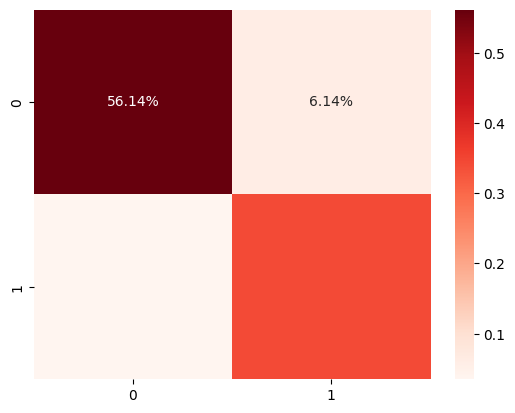

In [22]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pr)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pr))

print("Accuracy on training set: {:.3f}".format(et.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(et.score(X_test,y_test)))

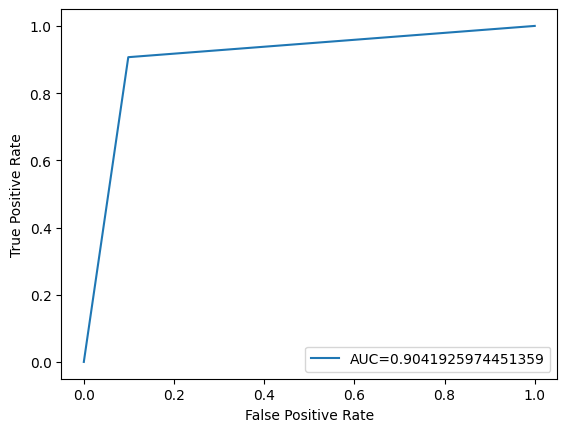

In [23]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pr)
auc = metrics.roc_auc_score(y_test, pr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [24]:
#K-nearest neighbours

knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 30, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy on training set: 1.000
Accuracy on test set: 0.947


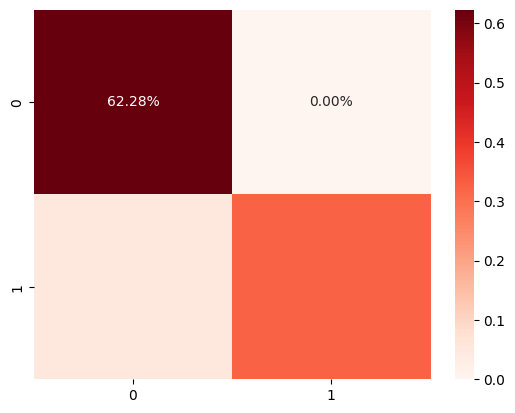

In [25]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_knn))

print("Accuracy on training set: {:.3f}".format(knn.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test,y_test)))

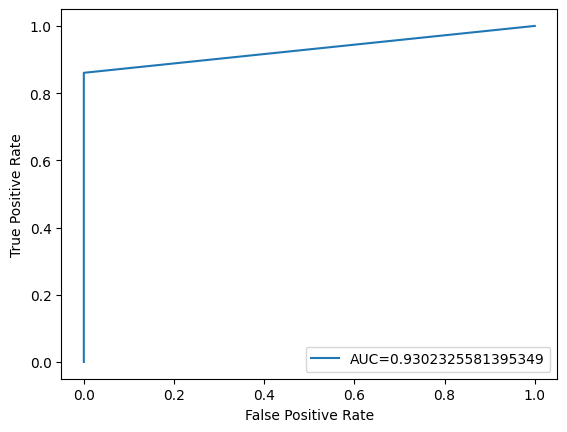

In [26]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_knn)
auc = metrics.roc_auc_score(y_test, pred_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [27]:
#SVM

model_svm=SVC(kernel='rbf',random_state=42)
model_svm.fit(X_train,y_train)
pred_svm = model_svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy on training set: 0.914
Accuracy on test set: 0.947


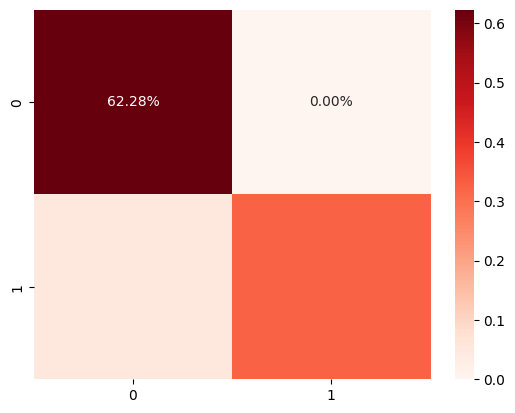

In [28]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test,pred_svm)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_svm))

print("Accuracy on training set: {:.3f}".format(model_svm.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(model_svm.score(X_test,y_test)))

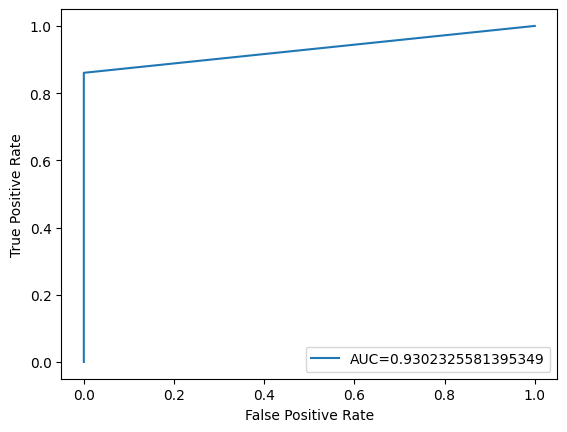

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_svm)
auc = metrics.roc_auc_score(y_test, pred_svm)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
#AdaBoost

ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
pred_ab = ab.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy on training set: 1.000
Accuracy on test set: 0.974


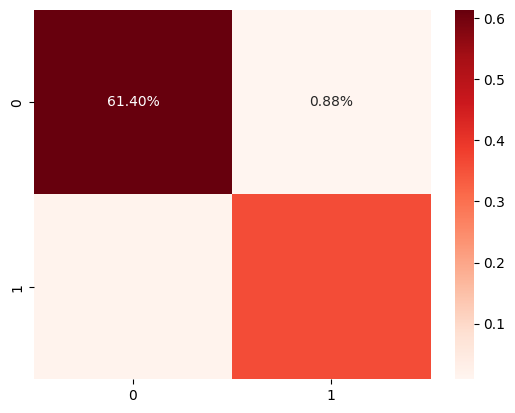

In [31]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test,pred_ab)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_ab))

print("Accuracy on training set: {:.3f}".format(ab.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(ab.score(X_test,y_test)))

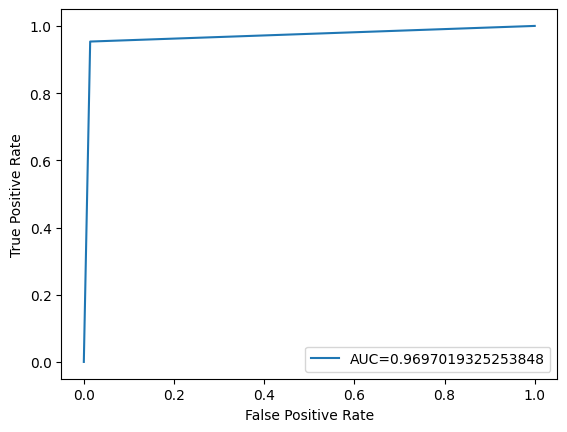

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_ab)
auc = metrics.roc_auc_score(y_test, pred_ab)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [33]:
#decision tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy on training set: 1.000
Accuracy on test set: 0.930


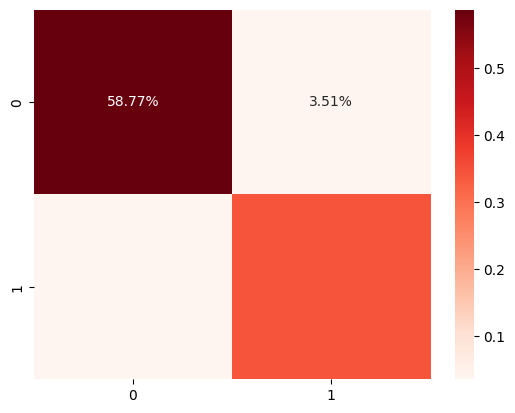

In [34]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred))

print("Accuracy on training set: {:.3f}".format(dt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test,y_test)))

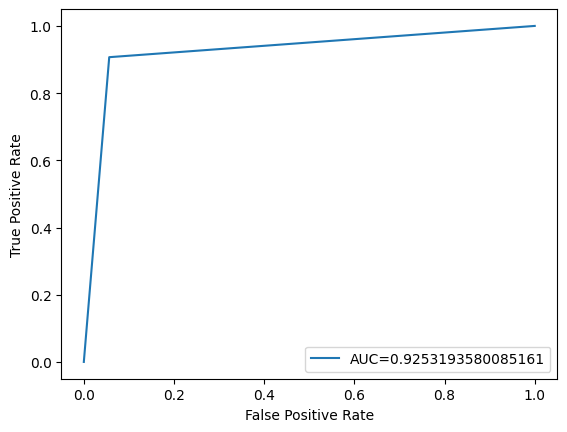

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [36]:
#Bagging classifier

bc = BaggingClassifier()
bc.fit(X_train,y_train)
pred_bc = bc.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy on training set: 0.996
Accuracy on test set: 0.965


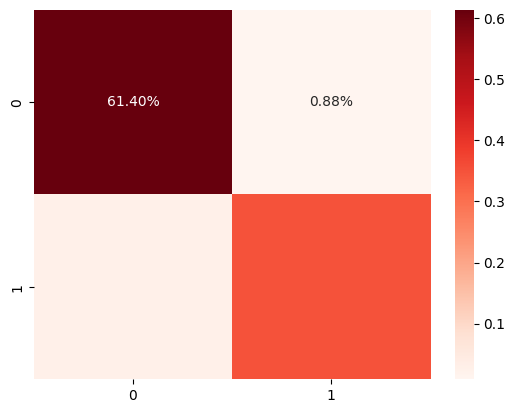

In [37]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_bc)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_bc))

print("Accuracy on training set: {:.3f}".format(bc.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(bc.score(X_test,y_test)))

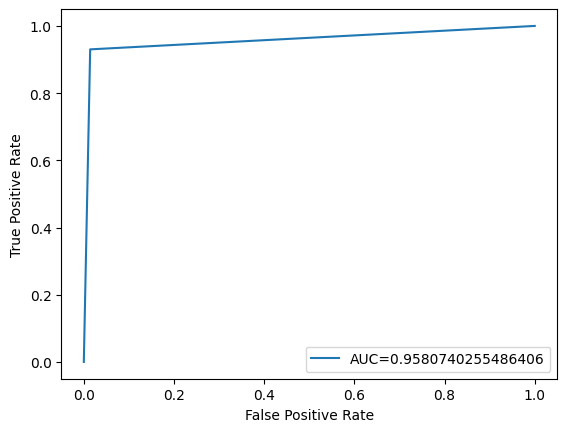

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_bc)
auc = metrics.roc_auc_score(y_test, pred_bc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [39]:
#GradientBoosting

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pred_gb = gb.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy on training set: 1.000
Accuracy on test set: 0.956


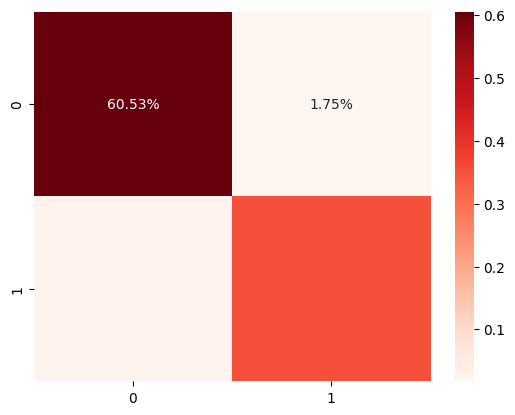

In [40]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_gb)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_gb))

print("Accuracy on training set: {:.3f}".format(gb.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test,y_test)))

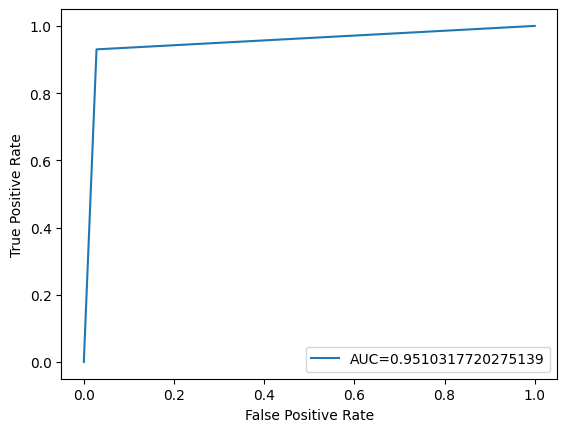

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_gb)
auc = metrics.roc_auc_score(y_test, pred_gb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [42]:
#RandomForest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy on training set: 1.000
Accuracy on test set: 0.965


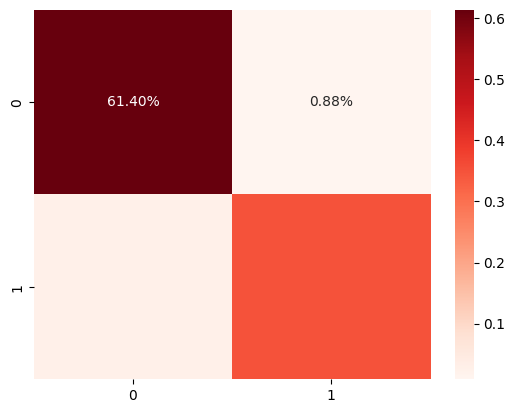

In [43]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#classification report
print(classification_report(y_test,pred_rf))

print("Accuracy on training set: {:.3f}".format(rf.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,y_test)))

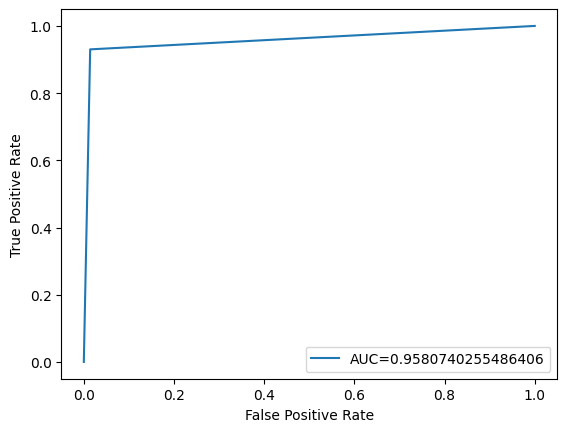

In [44]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_rf)
auc = metrics.roc_auc_score(y_test, pred_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [53]:
X1=ab.predict([[18.22,	18.7,	120.3,	1033,	0.1148,	0.1485,	0.1772,	0.106,	0.2092,	0.0631,	0.8337,	1.593,	4.877,	98.81,	0.003899,	0.02961,	0.02817,	0.009222,	0.02674,	0.005126,	20.6,	24.13,	135.1,	1321,	0.128,	0.2297,	0.2623,	0.1325,	0.3021,	0.07987
]])
print(X1)

[1]


In [50]:
X2=ab.predict([[13.54,	14.36,	87.46,	566.3,	0.09779	,0.08129,	0.06664,	0.04781,	0.1885,	0.05766,	0.2699,	0.7886,	2.058,	23.56,	0.008462,	0.0146,	0.02387,	0.01315,	0.0198,	0.0023,	15.11,	19.26,	99.7,	711.2,	0.144,	0.1773,	0.239,	0.1288,	0.2977,	0.07259
]])
X2

array([0], dtype=int64)

In [54]:
X3=ab.predict([[9.504,	12.44,	60.34,	273.9,	0.1024,	0.06492,	0.02956,	0.02076,	0.1815,	0.06905,	0.2773,	0.9768,	1.909,	15.7,	0.009606,	0.01432,	0.01985,	0.01421	,0.02027,	0.002968,	10.23,	15.66,	65.13,	314.9,	0.1324,	0.1148,	0.08867,	0.06227,	0.245,	0.07773
]])
print(X3)

[0]


In [52]:
X4=ab.predict([[17.02,	23.98,	112.8,	899.3,	0.1197,	0.1496,	0.2417,	0.1203,	0.2248,	0.06382,	0.6009,	1.398,	3.999,	67.78,	0.008268,	0.03082,	0.05042,	0.01112,	0.02102,	0.003854,	20.88,	32.09,	136.1,	1344,	0.1634,	0.3559,	0.5588,	0.1847,	0.353,	0.08482
]])
X4

array([1], dtype=int64)